### Decision Trees

In [124]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image

In [21]:
np.seed = 7
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros(100)
print(train_data.shape)
train_data = np.r_[train_data, np.random.normal(size=(100,2),loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

(100, 2)


In [20]:
train_data.shape

(200, 2)

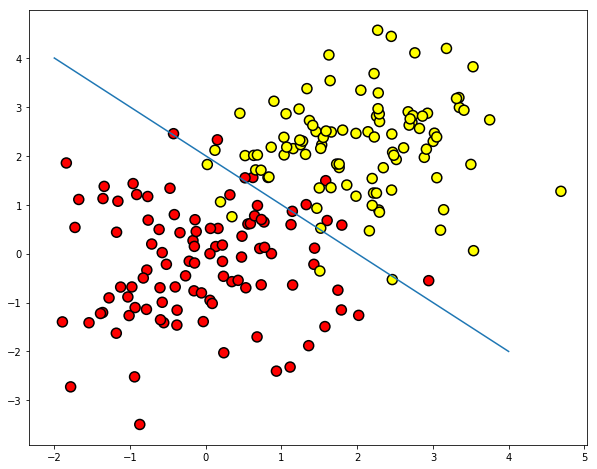

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, s=100,
            cmap="autumn", edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [4]:
from sklearn.tree import DecisionTreeClassifier

def get_grid(data):
    x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
    y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [5]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=17)

clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

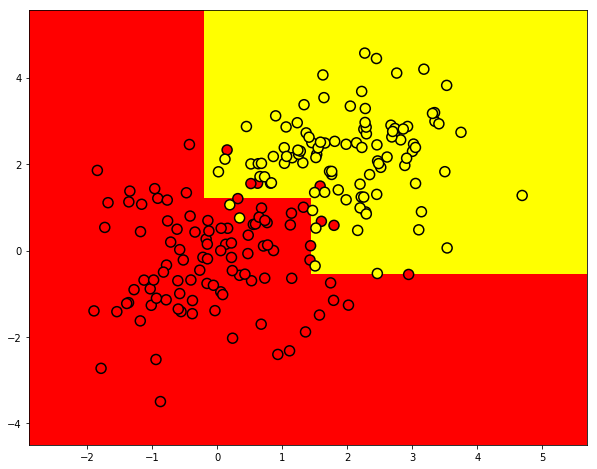

In [6]:
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:,0], train_data[:,1],c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)

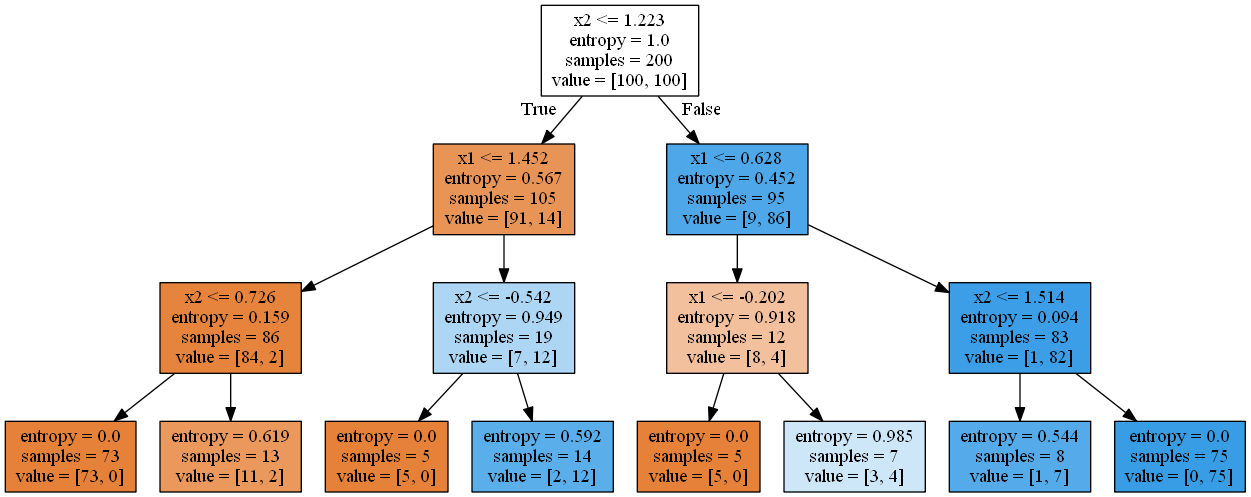

In [15]:
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1','x2'],
                out_file='small_tree.dot', filled=True)
!dot -Tpng small_tree.dot -o small_tree.png
Image("small_tree.png")

### Задача регрессии

In [59]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel() #ravel - сжимает массив до одной оси
    return np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X**2) + 1.5 * np.exp(-(X-2)**2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_test, noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

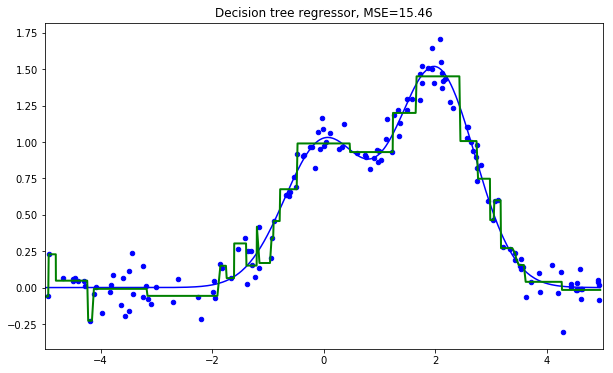

In [60]:
plt.figure(figsize=(10,6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c = "b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE=%.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

### kNN

In [61]:
df = pd.read_csv('data/telecom_churn.csv')

In [62]:
df['International plan'] = pd.factorize(df['International plan']) [0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [67]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size = 0.3, random_state = 17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [68]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

0.94

In [69]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.881

### Настройка параметров моделей

#### Decision Tree

In [70]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
              'max_features': range(4,19)}

In [73]:
tree_grid = GridSearchCV(tree,tree_params, cv=5, n_jobs=-1, verbose=True)

In [75]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    5.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [76]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [77]:
tree_grid.best_score_

0.9425632233176168

In [79]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.946

#### kNN

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [82]:
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_jobs=-1))])

In [83]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [84]:
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose = True)

In [85]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [89]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 7}, 0.8859837119588513)

In [90]:
accuracy_score(y_test, knn_grid.predict(X_test))

0.89

### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.9494233119813256


In [94]:
forest_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

In [95]:
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

In [97]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [98]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 9, 'max_features': 6}, 0.9511358765537934)

In [99]:
accuracy_score(y_test, forest_grid.predict(X_test))

0.953

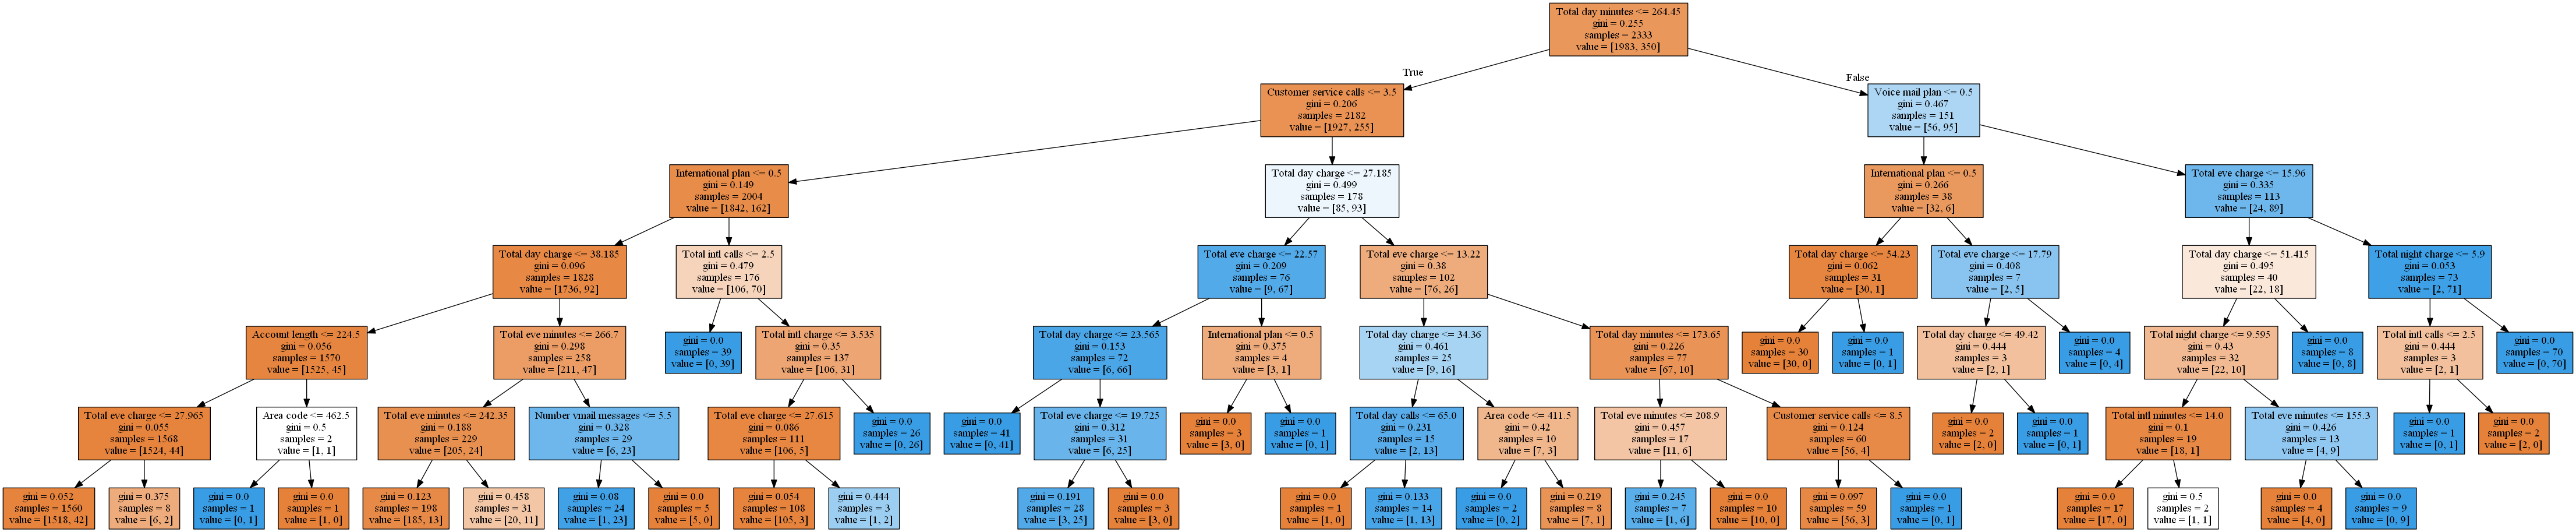

In [101]:
export_graphviz(tree_grid.best_estimator_, feature_names=df.columns, 
out_file='churn_tree.dot', filled=True)

!dot -Tpng churn_tree.dot -o churn_tree.png
Image('churn_tree.png')

### Complex case for decision trees

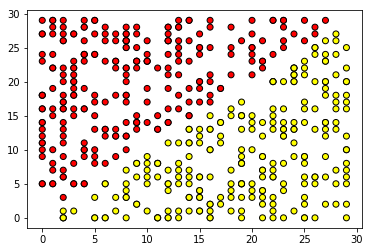

In [102]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

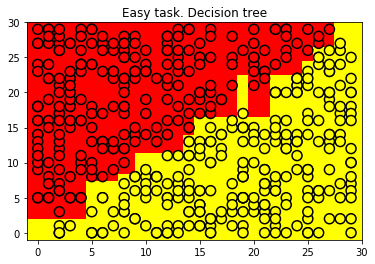

In [110]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree');

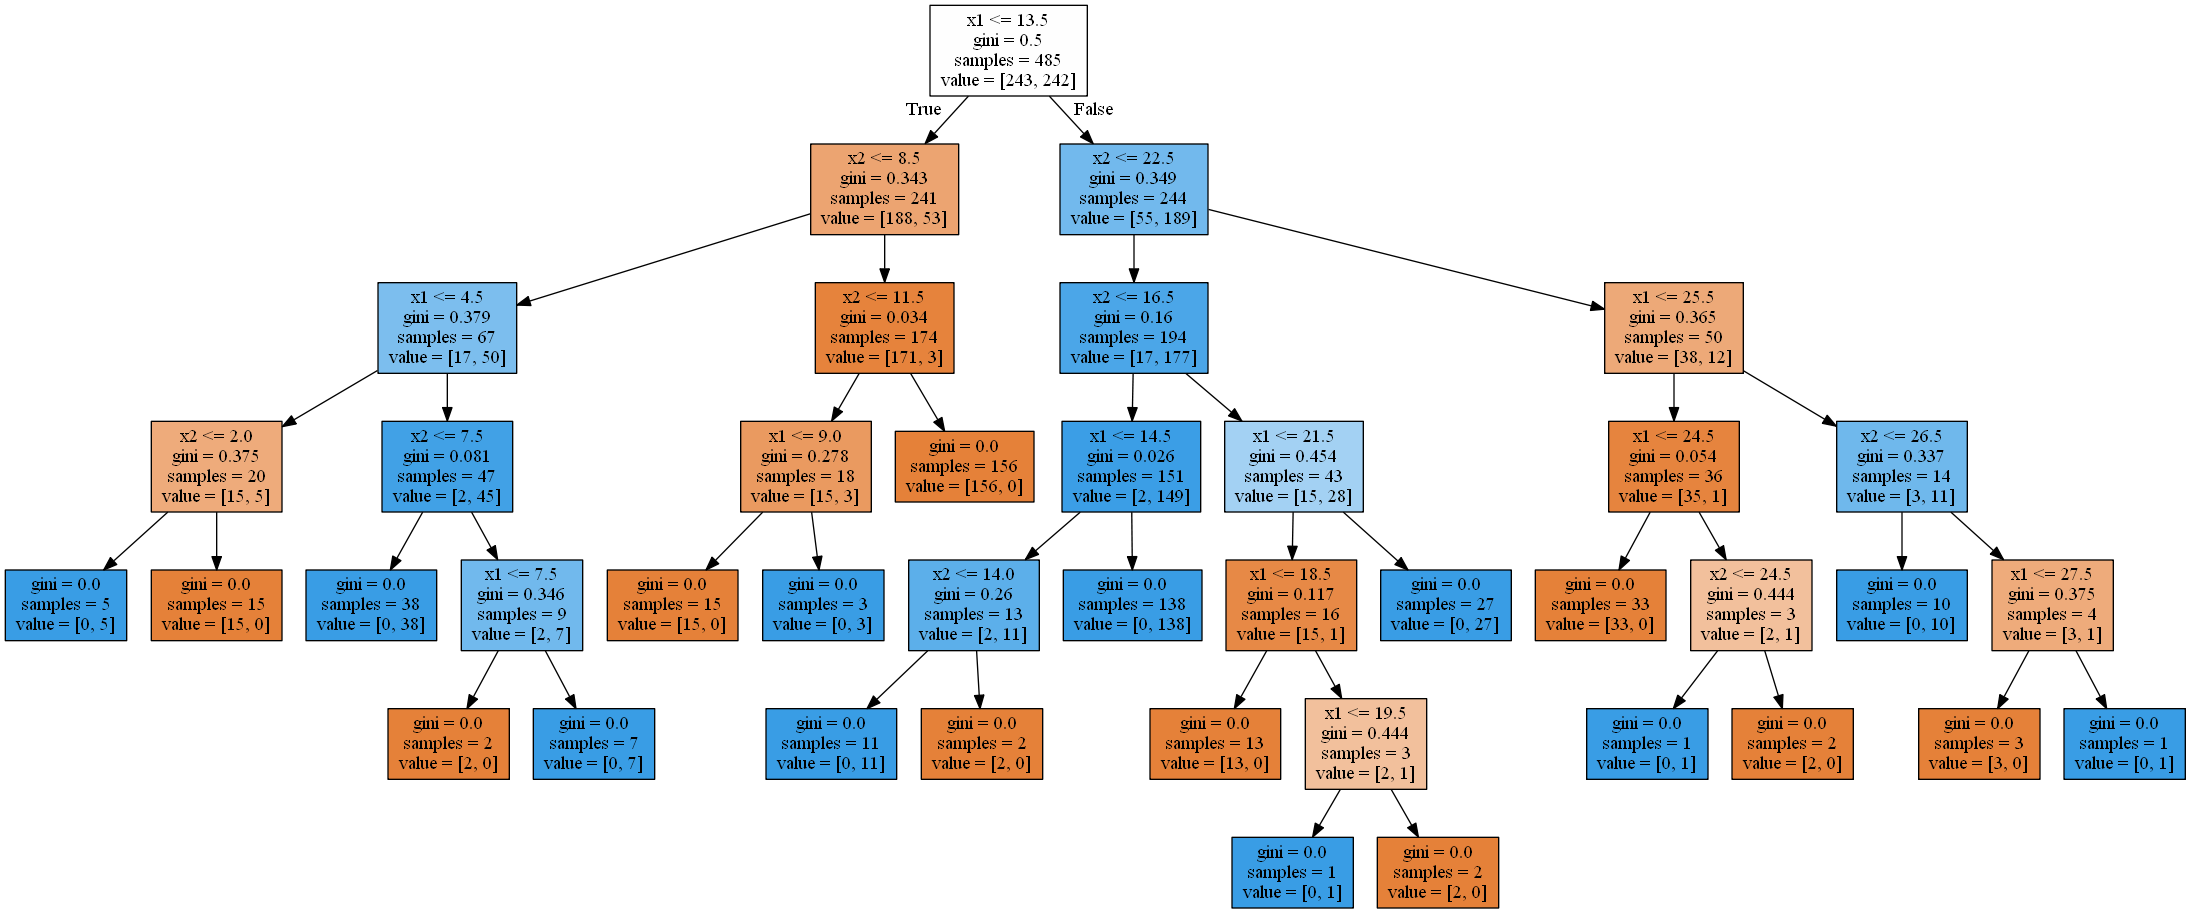

In [107]:
export_graphviz(tree, feature_names=['x1', 'x2'], 
out_file='deep_toy_tree.dot', filled=True)
!dot -Tpng deep_toy_tree.dot -o deep_toy_tree.png
Image('deep_toy_tree.png')

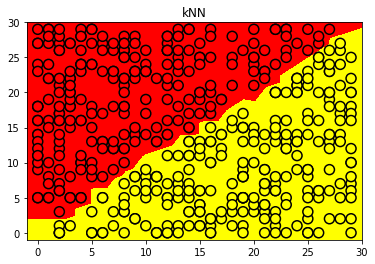

In [109]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.title('kNN');

### Characters recognition (MNIST)

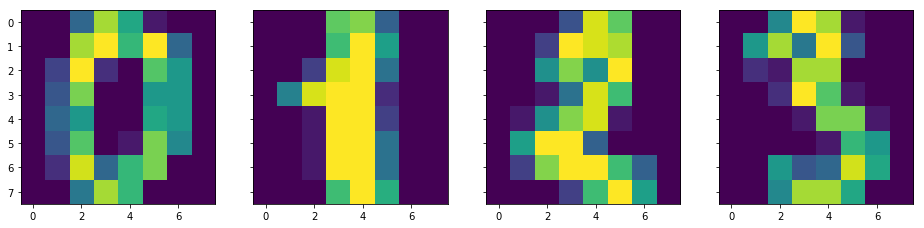

In [116]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]))

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state=17)

In [118]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [119]:
tree_pred = tree.predict(X_test)
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred), accuracy_score(y_test, tree_pred)

(0.9740740740740741, 0.6666666666666666)

In [120]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    3.0s finished
E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], 'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [121]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 20, 'max_features': 64}, 0.8440731901352426)

In [122]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.9865458422397149

In [125]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5))

0.9349085619110404

### Complex case for kNN

In [190]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)
    x1 = 0.3 * y
    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 17)

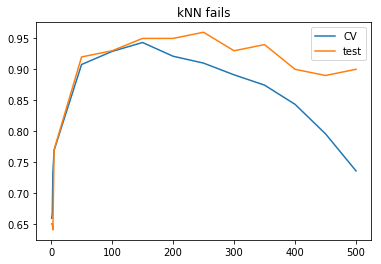

In [191]:
from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))
for k in n_neighb:

    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    knn.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='test')
plt.title('kNN fails')
plt.legend();

### DT for comparison

In [192]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_test, tree.predict(X_test))
print('Decision tree. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0
